In [1]:
import os
import fastai
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dies.gan import *

from dies.data import tp_from_df_from_dtypes, get_y_ranges, split_by_year
from dies.mlp import MultiLayerPerceptron

from torch.nn import Sigmoid
from fastai.layers import Identity
from fastai.optimizer import RMSProp
from fastai.optimizer import Adam
from fastai.tabular.all import *

In [2]:
fastai.__version__

'2.3.0'

In [3]:
pd.options.mode.chained_assignment = None

In [4]:
loss_type = 2
epochs = 10
lr = 2e-5
bs = 64
val_size=0.2

# path = '/home/maik/data/prophesy-data/WindSandbox2015/'
files = [f for f in os.listdir(path) if f.endswith('.h5')]
file = path + files[0]
df = pd.read_hdf(file, key='/powerdata')

FileNotFoundError: [Errno 2] No such file or directory: '/home/maik/data/prophesy-data/WindSandbox2015/'

In [5]:
df.columns

NameError: name 'df' is not defined

In [6]:
splits = RandomSplitter(valid_pct=val_size)(range_of(df))
cat_names = []
cont_names = [
    'AirPressure', 
    'Temperature', 
    'Humidity', 
    'WindSpeed100m', 
    'WindSpeed10m', 
    'WindDirectionZonal100m',
    'WindDirectionMeridional100m',
    'PowerGeneration'
]
y_names = cont_names

tdf = TabularPandas(df, cat_names=[], cont_names=cont_names, y_names=y_names, splits=splits)
dls = tdf.dataloaders(bs=bs)

In [7]:
input_size = len(cont_names) + len(cat_names)

generator_model = MultiLayerPerceptron(
    ann_structure=[100, 64, 32, 16, input_size], use_bn=False, bn_cont=False
)
critic_model = MultiLayerPerceptron(
    ann_structure=[input_size, 16, 32, 64, 1],
    use_bn=False,
    bn_cont=False,
    final_activation=Identity,
)

gan_learn = GANLearner(
    dls=dls, 
    generator=generator_model, 
    critic=critic_model, 
    loss_type=loss_type, 
    opt_func=RMSProp, 
    clip=0.01, 
    n_gen=1, 
    n_crit=4,
    tabular=True
)

In [8]:
gan_learn.fit(epochs)

epoch,train_loss,valid_loss,time
0,0.002039,-0.000002,00:01
1,0.002047,0.000000,00:01
2,0.002047,0.000000,00:01
3,0.002047,0.000000,00:01
4,0.002047,0.000000,00:01
5,0.002047,0.000000,00:01
6,0.002047,0.000000,00:01
7,0.002047,0.000000,00:01
8,0.002047,0.000000,00:01
9,0.002047,0.000000,00:01


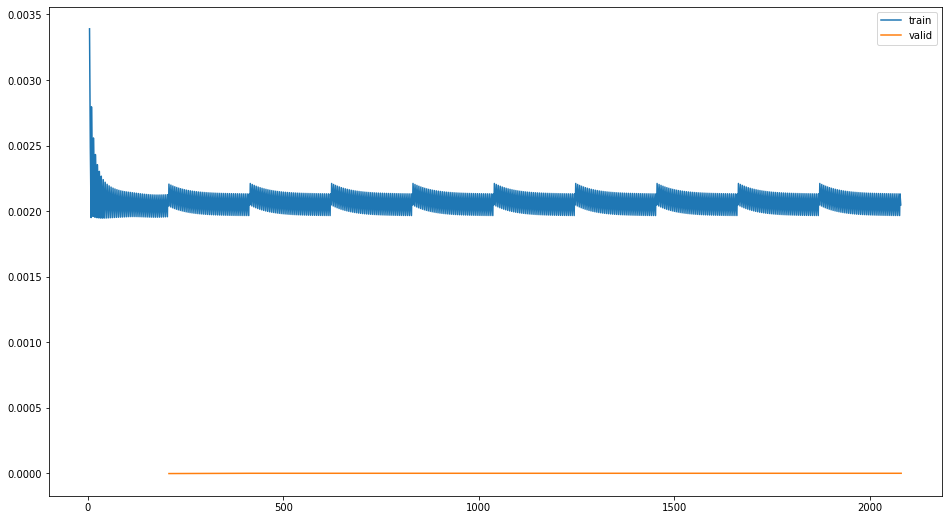

In [9]:
plt.figure(figsize=(16, 9))
gan_learn.recorder.plot_loss()

In [10]:
real_x = dls.one_batch()[1].numpy()
#fake_x = gan_learn.model.generator(real_x, gan_learn.model.input_samples(real_x)).detach().numpy()
fake_x = gan_learn.model.generate_samples(real_x, real_x).detach().numpy()

In [11]:
real_x.shape==fake_x.shape

True

In [12]:
real_target = real_x[:, -1]
fake_target = fake_x[:, -1]

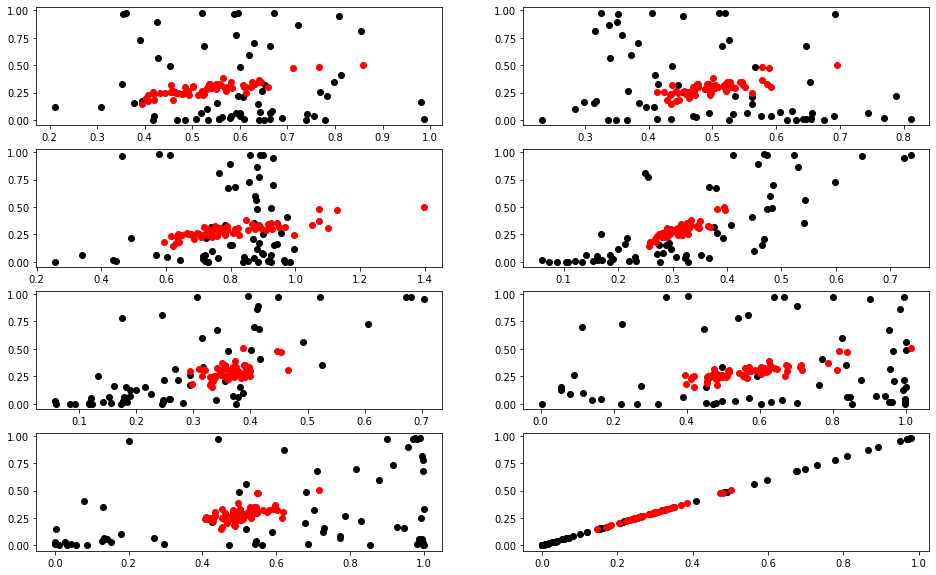

In [13]:
plt.figure(figsize=(16, 10))
plt.subplot(421)
plt.plot(real_x[:, 0], real_target, 'ko')
plt.plot(fake_x[:, 0], fake_target, 'ro')

plt.subplot(422)
plt.plot(real_x[:, 1], real_target, 'ko')
plt.plot(fake_x[:, 1], fake_target, 'ro')

plt.subplot(423)
plt.plot(real_x[:, 2], real_target, 'ko')
plt.plot(fake_x[:, 2], fake_target, 'ro')

plt.subplot(424)
plt.plot(real_x[:, 3], real_target, 'ko')
plt.plot(fake_x[:, 3], fake_target, 'ro')

plt.subplot(425)
plt.plot(real_x[:, 4], real_target, 'ko')
plt.plot(fake_x[:, 4], fake_target, 'ro')

plt.subplot(426)
plt.plot(real_x[:, 5], real_target, 'ko')
plt.plot(fake_x[:, 5], fake_target, 'ro')

plt.subplot(427)
plt.plot(real_x[:, 6], real_target, 'ko')
plt.plot(fake_x[:, 6], fake_target, 'ro')

plt.subplot(428)
plt.plot(real_x[:, 7], real_target, 'ko')
plt.plot(fake_x[:, 7], fake_target, 'ro')

plt.show()

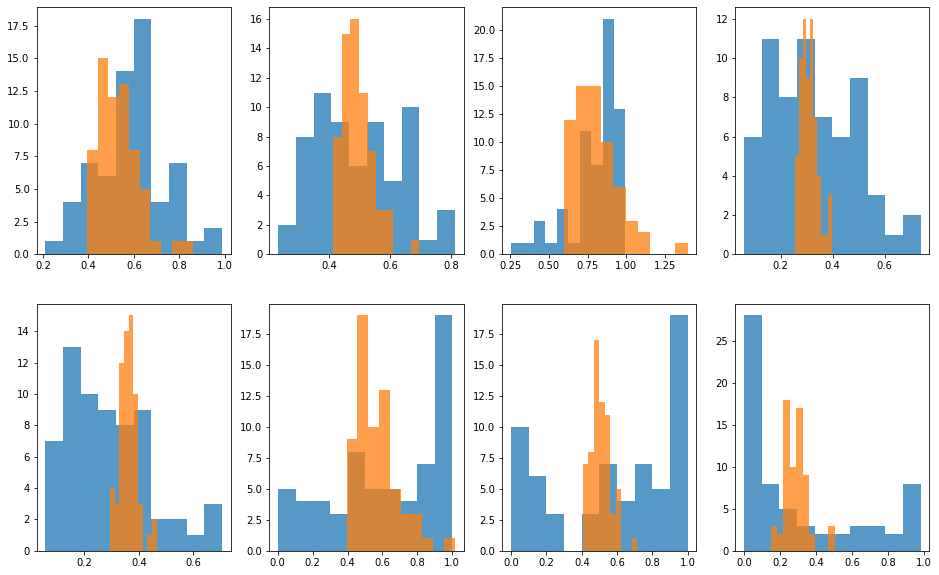

In [14]:
plt.figure(figsize=(16, 10))

plt.subplot(241)
plt.hist(real_x[:, 0], alpha=0.75)
plt.hist(fake_x[:, 0], alpha=0.75)

plt.subplot(242)
plt.hist(real_x[:, 1], alpha=0.75)
plt.hist(fake_x[:, 1], alpha=0.75)

plt.subplot(243)
plt.hist(real_x[:, 2], alpha=0.75)
plt.hist(fake_x[:, 2], alpha=0.75)

plt.subplot(244)
plt.hist(real_x[:, 3], alpha=0.75)
plt.hist(fake_x[:, 3], alpha=0.75)

plt.subplot(245)
plt.hist(real_x[:, 4], alpha=0.75)
plt.hist(fake_x[:, 4], alpha=0.75)

plt.subplot(246)
plt.hist(real_x[:, 5], alpha=0.75)
plt.hist(fake_x[:, 5], alpha=0.75)

plt.subplot(247)
plt.hist(real_x[:, 6], alpha=0.75)
plt.hist(fake_x[:, 6], alpha=0.75)

plt.subplot(248)
plt.hist(real_x[:, 7], alpha=0.75)
plt.hist(fake_x[:, 7], alpha=0.75)

plt.show()